### Importing the necessary packages

In [56]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets,linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
from sklearn.tree import DecisionTreeClassifier

In [57]:
df = pd.read_csv('Housing.csv')
df

,rownames,price,lotsize,bedrooms,bathrms,stories,driveway,recroom,fullbase,gashw,airco,garagepl,prefarea
0,1,42000,5850,3,1,2,yes,no,yes,no,no,1,no
1,2,38500,4000,2,1,1,yes,no,no,no,no,0,no
2,3,49500,3060,3,1,1,yes,no,no,no,no,0,no
3,4,60500,6650,3,1,2,yes,yes,no,no,no,0,no
4,5,61000,6360,2,1,1,yes,no,no,no,no,0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...
541,542,91500,4800,3,2,4,yes,yes,no,no,yes,0,no
542,543,94000,6000,3,2,4,yes,no,no,no,yes,0,no
543,544,103000,6000,3,2,4,yes,yes,no,no,yes,1,no
544,545,105000,6000,3,2,2,yes,yes,no,no,yes,1,no


In [58]:
df.drop('rownames',inplace=True,axis=1)

In [59]:
df.columns

Index(['price', 'lotsize', 'bedrooms', 'bathrms', 'stories', 'driveway',
       'recroom', 'fullbase', 'gashw', 'airco', 'garagepl', 'prefarea'],
      dtype='object')

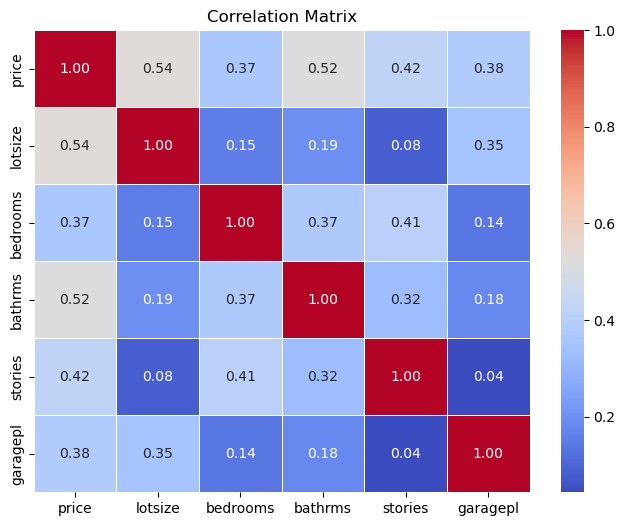

In [60]:
corr_matrix = df.corr()

plt.figure(figsize=(8,6))
sns.heatmap(corr_matrix,annot=True,cmap = 'coolwarm',fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

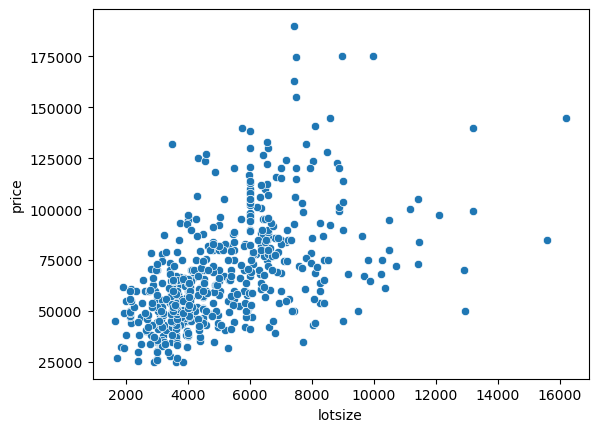

In [61]:
sns.scatterplot(x = 'lotsize',y='price',data =df)
plt.xlabel("lotsize")
plt.ylabel("price")
plt.show


<function matplotlib.pyplot.show(close=None, block=None)>

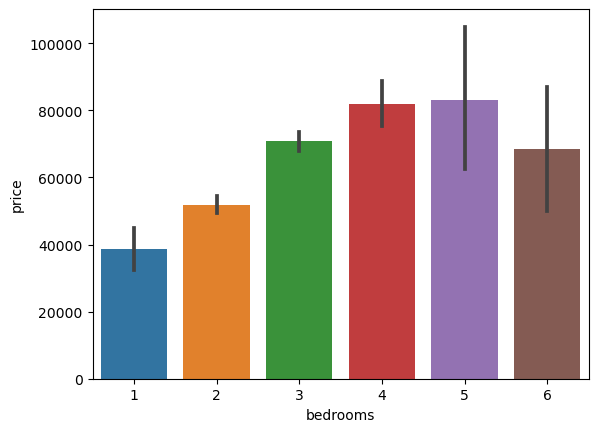

In [62]:
sns.barplot(x = 'bedrooms',y='price',data =df)
plt.xlabel("bedrooms")
plt.ylabel("price")
plt.show

In [63]:
df['bathrms'].unique()

array([1, 2, 3, 4], dtype=int64)

<function matplotlib.pyplot.show(close=None, block=None)>

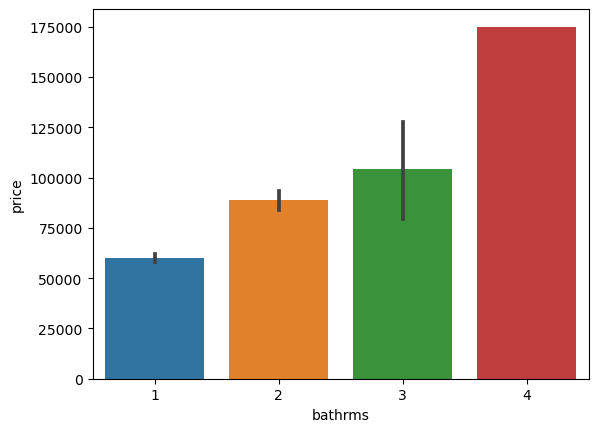

In [64]:
sns.barplot(x = 'bathrms',y='price',data =df)
plt.xlabel("bathrms")
plt.ylabel("price")
plt.show

In [65]:
df.loc[df['driveway'] == 'yes', 'driveway'] = 1
df.loc[df['driveway'] == 'no', 'driveway'] = 0
df.loc[df['recroom'] == 'yes', 'recroom'] = 1
df.loc[df['recroom'] == 'no', 'recroom'] = 0
df.loc[df['fullbase'] == 'yes', 'fullbase'] = 1
df.loc[df['fullbase'] == 'no', 'fullbase'] = 0
df.loc[df['gashw'] == 'yes', 'gashw'] = 1
df.loc[df['gashw'] == 'no', 'gashw'] = 0
df.loc[df['airco'] == 'yes', 'airco'] = 1
df.loc[df['airco'] == 'no', 'airco'] = 0
df.loc[df['prefarea'] == 'yes', 'prefarea'] = 1
df.loc[df['prefarea'] == 'no', 'prefarea'] = 0

In [66]:
X = df.iloc[:,1:12]
Y = df['price']


In [67]:
X

,lotsize,bedrooms,bathrms,stories,driveway,recroom,fullbase,gashw,airco,garagepl,prefarea
0,5850,3,1,2,1,0,1,0,0,1,0
1,4000,2,1,1,1,0,0,0,0,0,0
2,3060,3,1,1,1,0,0,0,0,0,0
3,6650,3,1,2,1,1,0,0,0,0,0
4,6360,2,1,1,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
541,4800,3,2,4,1,1,0,0,1,0,0
542,6000,3,2,4,1,0,0,0,1,0,0
543,6000,3,2,4,1,1,0,0,1,1,0
544,6000,3,2,2,1,1,0,0,1,1,0


In [68]:
print(Y.shape)
print(X.shape)

(546,)
(546, 11)


In [69]:
Y = Y.values.reshape(len(Y),1)


In [70]:
print(Y.shape)
print(X.shape)

(546, 1)
(546, 11)


In [71]:
X_train,X_test,Y_train,y_test = train_test_split(X,Y,test_size =0.2,random_state = 42)

### Using Linear Regression Model

In [72]:
model = linear_model.LinearRegression()

In [73]:
model.fit(X_train,Y_train)

LinearRegression()

In [74]:
y_pred = model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)


print(f'Mean Absolute Error (MAE): {mae}')
print(f'Mean Squared Error (MSE): {mse}')
print(f'Root Mean Squared Error (RMSE): {rmse}')
print(f'R-squared (R2) Score: {r2}')

Mean Absolute Error (MAE): 11463.135922494637
Mean Squared Error (MSE): 256524986.51986215
Root Mean Squared Error (RMSE): 16016.397426383443
R-squared (R2) Score: 0.6160238969106218
